In [1]:
import geopandas as gpd 
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

# Acesso à água no Brasil 

O presente estudo se propõe a realizar uma análise exploratória de dados para avaliar o progresso do Brasil em direção à universalização do acesso à água, um dos Objetivos de Desenvolvimento Sustentável (ODS) estabelecidos pela Organização das Nações Unidas (ONU).


 A água, elemento essencial à vida e ao bem-estar humano, é peça fundamental na concretização de metas globais voltadas para a erradicação da pobreza, promoção da saúde e garantia de condições dignas de vida para todas as pessoas. 


Nesse contexto, examinaremos os dados sobre disponibilidade de água encanada nos domicílios do território brasileiro, buscando compreender os avanços e quais os desafios que o Brasil terá de enfrentar para atingir essa  meta fundamental para o desenvolvimento sustentável.


## Importando os dados geográficos e os dados do censo 

Os dados sobre o acesso à água utilizadas foram os dados do CENSO nos anos de 1991, 2000 e 2010 sobre a porcentagem de domicílios com acesso à água encanada no Brasil.

Criamos dataframe com os dados nos níveis Municipal, Estadual e Nacional.

In [2]:
dados_MUN = pd.read_excel(r"C:\Users\Felipe\Documents\Introdução a economia\Base de dados\Bases Censo\Atlas 2013_municipal, estadual e Brasil.xlsx",
                     sheet_name = 'MUN 91-00-10', usecols = "A,B,C,D,E,EI")

dados_UF = pd.read_excel(r"C:\Users\Felipe\Documents\Introdução a economia\Base de dados\Bases Censo\Atlas 2013_municipal, estadual e Brasil.xlsx",
                     sheet_name = 'UF 91-00-10', usecols = "A,B,C,EG")


dados_BR = pd.read_excel(r"C:\Users\Felipe\Documents\Introdução a economia\Base de dados\Bases Censo\Atlas 2013_municipal, estadual e Brasil.xlsx",
                     sheet_name = 'BR 91-00-10', 
                    usecols= "B, EF")


Para gerar gráficos e mapas das análises foram importados 2 dataframes geográficos, dos municípios brasileiros e das unidades federativas.

In [3]:
municipios_br = gpd.read_file(r"C:\Users\Felipe\Documents\Introdução a economia\Base de dados\BR_Municipios_2022\BR_Municipios_2022.shp")

uf_br = gpd.read_file(r"C:\Users\Felipe\Documents\Introdução a economia\Base de dados\BR_UF_2022\BR_UF_2022.shp")

## Cruzando os dados geográficos com as bases do Censo 



Para gerar os mapas com os dados do acesso à água, foi feita uma interação sobre as bases dos dados geográficos, em cada interação localizamos os dados dos 3 anos análisados e são criados novas colunas nas bases geográficas com os valores. 

Isso é feito para a base de dados das unidades federativas e de municípios. Na base de dados dos municípios fazemos o tratamento para o caso de valores faltantes. 

In [4]:

for i in uf_br.itertuples():
    resul = dados_UF.loc[ (dados_UF['UF'] == float(i.CD_UF)) ]
    aux = resul['T_AGUA'].values
    uf_br.at[i.Index,'T_AGUA_1991']= aux[0]
    uf_br.at[i.Index,'T_AGUA_2000']= aux[1]
    uf_br.at[i.Index,'T_AGUA_2010']= aux[2]
    
for i in municipios_br.itertuples():
    resul = dados_MUN.loc[ (dados_MUN['Codmun7'] == float(i.CD_MUN)) ]
    aux = resul['T_AGUA'].values
    if len(aux)!= 0:
        municipios_br.at[i.Index,'T_AGUA_1991']= aux[0]
        municipios_br.at[i.Index,'T_AGUA_2000']= aux[1]
        municipios_br.at[i.Index,'T_AGUA_2010']= aux[2]
    else:
        municipios_br.at[i.Index,'T_AGUA_1991']= np.nan
        municipios_br.at[i.Index,'T_AGUA_2000']= np.nan
        municipios_br.at[i.Index,'T_AGUA_2010']= np.nan
    

## Analisando acesso à água nas UFs nos anos de 1991 2000 e 2010

<Axes: >

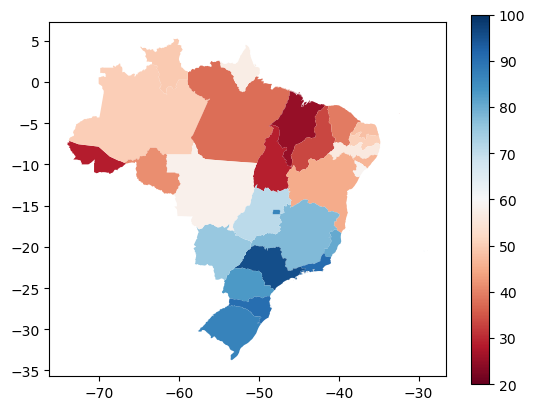

In [5]:
uf_br.plot(column = 'T_AGUA_1991',cmap= 'RdBu', legend=True,vmin=20.0,vmax=100.0)

<Axes: >

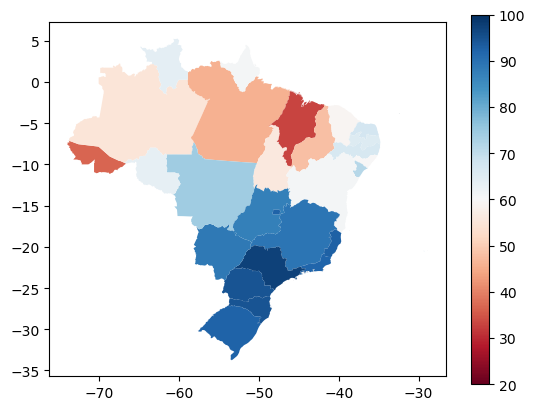

In [6]:
uf_br.plot(column = 'T_AGUA_2000',cmap= 'RdBu', legend=True,vmin=20.0,vmax=100.0)

<Axes: >

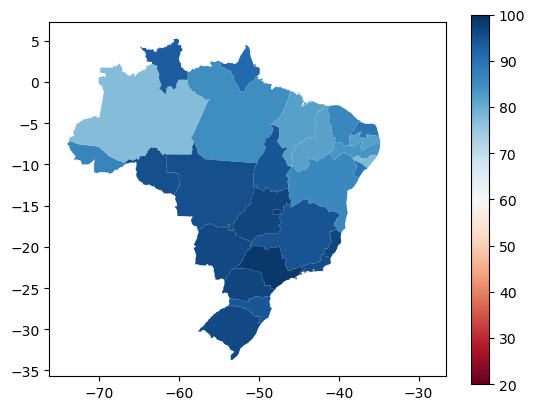

In [7]:
uf_br.plot(column = 'T_AGUA_2010',cmap= 'RdBu', legend=True,vmin=20.0,vmax=100.0)

In [8]:
uf_br['dif1'] = uf_br['T_AGUA_2000']- uf_br['T_AGUA_1991']
uf_br['dif2'] = uf_br['T_AGUA_2010']- uf_br['T_AGUA_2000']

In [9]:
uf_br.head()

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry,T_AGUA_1991,T_AGUA_2000,T_AGUA_2010,dif1,dif2
0,12,Acre,AC,Norte,164173.429,"POLYGON ((-68.79282 -10.99957, -68.79367 -10.9...",28.69,36.87,86.51,8.18,49.64
1,13,Amazonas,AM,Norte,1559255.881,"POLYGON ((-56.76292 -3.23221, -56.76789 -3.242...",50.16,54.76,77.32,4.60,22.56
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ...",37.53,45.66,84.70,8.13,39.04
3,16,Amapá,AP,Norte,142470.762,"MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ...",56.97,60.91,91.44,3.94,30.53
4,17,Tocantins,TO,Norte,277423.627,"POLYGON ((-48.24830 -13.19239, -48.24844 -13.1...",28.97,55.73,94.33,26.76,38.60


<Axes: >

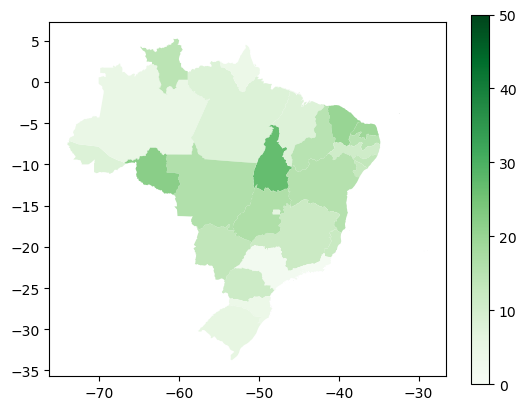

In [11]:
uf_br.plot(column='dif1',cmap='Greens',legend=True,vmin=0,vmax=50.0)

NameError: name 'save' is not defined

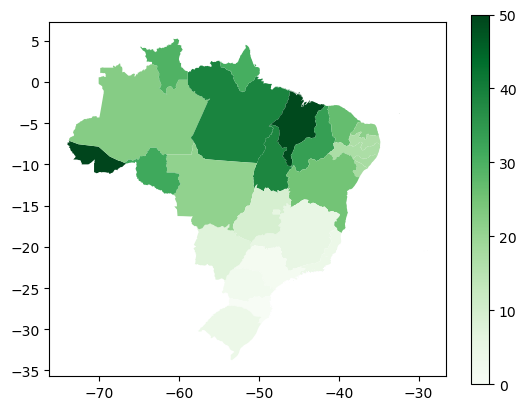

In [12]:
uf_br.plot(column='dif2',cmap='Greens',legend=True,vmin=0,vmax=50)

In [13]:
municipios_br['T_AGUA_1991'].max()

100.0

In [ ]:
municipios_br.plot(column = 'T_AGUA_1991',cmap = 'RdBu',legend=True)


In [ ]:
municipios_br.plot(column = 'T_AGUA_2000',cmap = 'RdBu',legend=True)


In [ ]:
municipios_br.plot(column = 'T_AGUA_2010',cmap = 'RdBu',legend=True)


In [ ]:
abaixo_50 = municipios_br.loc[municipios_br['T_AGUA_2010'] <50]

In [ ]:
len(abaixo_50)

In [ ]:
base = municipios_br.plot()

In [ ]:
abaixo_50.plot(color='red')
